In [12]:
import numpy as np
from scipy.misc import imresize
import pylab
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from skimage import transform, filters
import sys, pylab, operator, csv
#import util
import os
import urllib

%matplotlib inline

%load_ext autoreload
%autoreload 2

import caffe

from helpers import *
from heatmaps import *
#from repro_EB_figs import *
from optimize_mask import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
gpu = 0
net_type = 'googlenet'

In [3]:
caffe.set_device(gpu)
caffe.set_mode_gpu()

net = get_net(net_type)

# for each layer, show the output shape
for layer_name, blob in net.blobs.iteritems():
    print layer_name + '\t' + str(blob.data.shape)

data	(1, 3, 224, 224)
conv1/7x7_s2	(10, 64, 112, 112)
pool1/3x3_s2	(10, 64, 56, 56)
pool1/norm1	(10, 64, 56, 56)
conv2/3x3_reduce	(10, 64, 56, 56)
conv2/3x3	(10, 192, 56, 56)
conv2/norm2	(10, 192, 56, 56)
pool2/3x3_s2	(10, 192, 28, 28)
pool2/3x3_s2_pool2/3x3_s2_0_split_0	(10, 192, 28, 28)
pool2/3x3_s2_pool2/3x3_s2_0_split_1	(10, 192, 28, 28)
pool2/3x3_s2_pool2/3x3_s2_0_split_2	(10, 192, 28, 28)
pool2/3x3_s2_pool2/3x3_s2_0_split_3	(10, 192, 28, 28)
inception_3a/1x1	(10, 64, 28, 28)
inception_3a/3x3_reduce	(10, 96, 28, 28)
inception_3a/3x3	(10, 128, 28, 28)
inception_3a/5x5_reduce	(10, 16, 28, 28)
inception_3a/5x5	(10, 32, 28, 28)
inception_3a/pool	(10, 192, 28, 28)
inception_3a/pool_proj	(10, 32, 28, 28)
inception_3a/output	(10, 256, 28, 28)
inception_3a/output_inception_3a/output_0_split_0	(10, 256, 28, 28)
inception_3a/output_inception_3a/output_0_split_1	(10, 256, 28, 28)
inception_3a/output_inception_3a/output_0_split_2	(10, 256, 28, 28)
inception_3a/output_inception_3a/output_0_spl

In [9]:
labels_desc = np.loadtxt('/home/ruthfong/packages/caffe/data/ilsvrc12/synset_words.txt', str, delimiter='\t')
(paths, labels) = read_imdb('/home/ruthfong/packages/caffe/data/ilsvrc12/val_imdb.txt')
paths = np.array(paths)
labels = np.array(labels)
data_desc = 'val'
res_dir = '/data/ruthfong/neural_coding/results_reb/occ_masks_imagenet_googlenet_val_defaults/'
mask_dir = '/data/ruthfong/neural_coding/pycaffe_results/googlenet_train_heldout_given_grad_1_norm_0/min_top0_prob_blur/lr_-1.00_l1_lambda_-4.00_tv_lambda_-inf_l1_lambda_2_-2.00_beta_3.00_mask_scale_8_blur_mask_5_jitter_4_noise_-inf_num_iters_300_tv2_mask_init'
mask_paths = np.[os.path.join(mask_dir, '%d.npy' % x) for x in range(len(labels))]

In [5]:
transformer = get_ILSVRC_net_transformer(net)

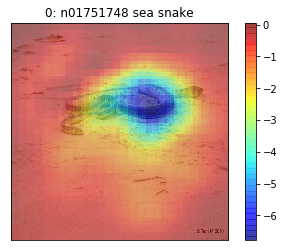

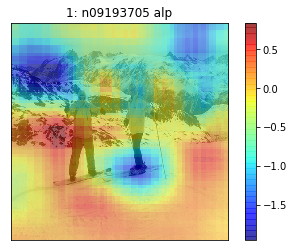

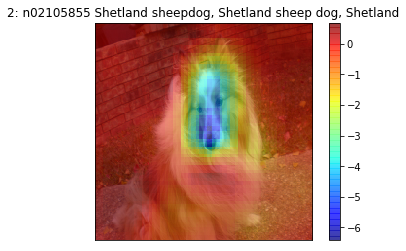

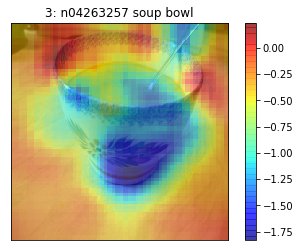

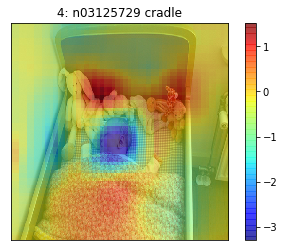

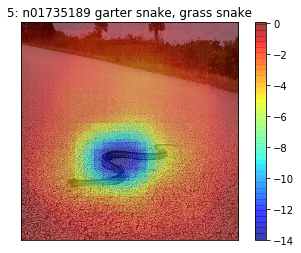

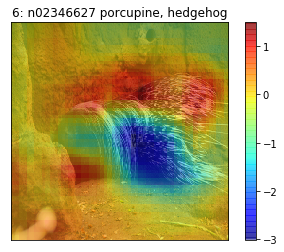

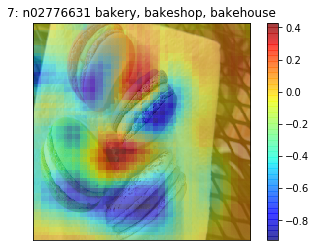

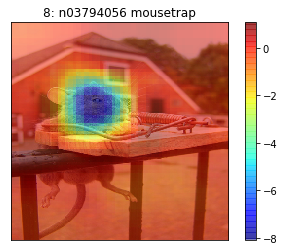

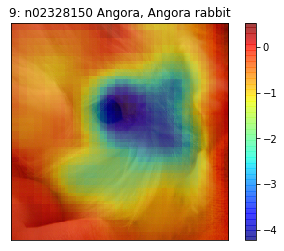

In [13]:
for i in range(10):
    img = transformer.preprocess('data', caffe.io.load_image(paths[i]))
    heatmap = np.load(os.path.join(res_dir, '%d.npy' % i))
    
    f, ax = plt.subplots(1,1)
    ax.imshow(transformer.deprocess('data', img))
    cax = ax.imshow(heatmap, alpha = 0.5, cmap = 'jet')
    f.colorbar(cax)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title('%d: %s' % (i, labels_desc[labels[i]]))
    plt.show()
    
    